In [16]:
#This is a Data Visualization Example of Energy Efficiancy, that eventually discovers 
#that the more compact the more energy efficient.

In [17]:
import pandas as pd
import os
from sklearn import preprocessing

In [18]:
%matplotlib inline

In [19]:
pathName = "Labfiles/Lab03A"

In [20]:
fileName = "EnergyEfficiencyRegressiondata.csv"
filePath = os.path.join(pathName, fileName)
eeframe = pd.read_csv(filePath)

In [21]:
eeframe = eeframe.drop("Cooling Load", 1)
#creating a dataframe, excluding Cooling Load column, since it isn't relavant for this analysis.

In [22]:
eeframe.head()#Notice the values are not close to each other in scale.  We must scale this data.

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,0.98,514.5,294.0,110.25,7,2,0,0,15.55
1,0.98,514.5,294.0,110.25,7,3,0,0,15.55
2,0.98,514.5,294.0,110.25,7,4,0,0,15.55
3,0.98,514.5,294.0,110.25,7,5,0,0,15.55
4,0.90,563.5,318.5,122.50,7,2,0,0,20.84


In [23]:
scaleList = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Glazing Area', 
             'Glazing Area Distribution']
# This is the list of columns to scale together.
arry = eeframe[scaleList].as_matrix()

In [24]:
eeframe[scaleList] = preprocessing.scale(arry)#

In [25]:
eeframe.head()#Notice now the values are scaled closer to one another. Making it easier to compare.

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,2.041777,-1.785875,-0.561951,-1.470077,7,2,-1.760447,-1.814575,15.55
1,2.041777,-1.785875,-0.561951,-1.470077,7,3,-1.760447,-1.814575,15.55
2,2.041777,-1.785875,-0.561951,-1.470077,7,4,-1.760447,-1.814575,15.55
3,2.041777,-1.785875,-0.561951,-1.470077,7,5,-1.760447,-1.814575,15.55
4,1.284979,-1.229239,0.000000,-1.198678,7,2,-1.760447,-1.814575,20.84


In [27]:
#Lets show a scatter_matrix of the data.
from pandas.tools.plotting import scatter_matrix 
import pandas.tools.rplot as rplot
import matplotlib.pyplot as plt
import numpy as np

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/pandas/tools/plotting.py:3234: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "is being cleared", UserWarning)


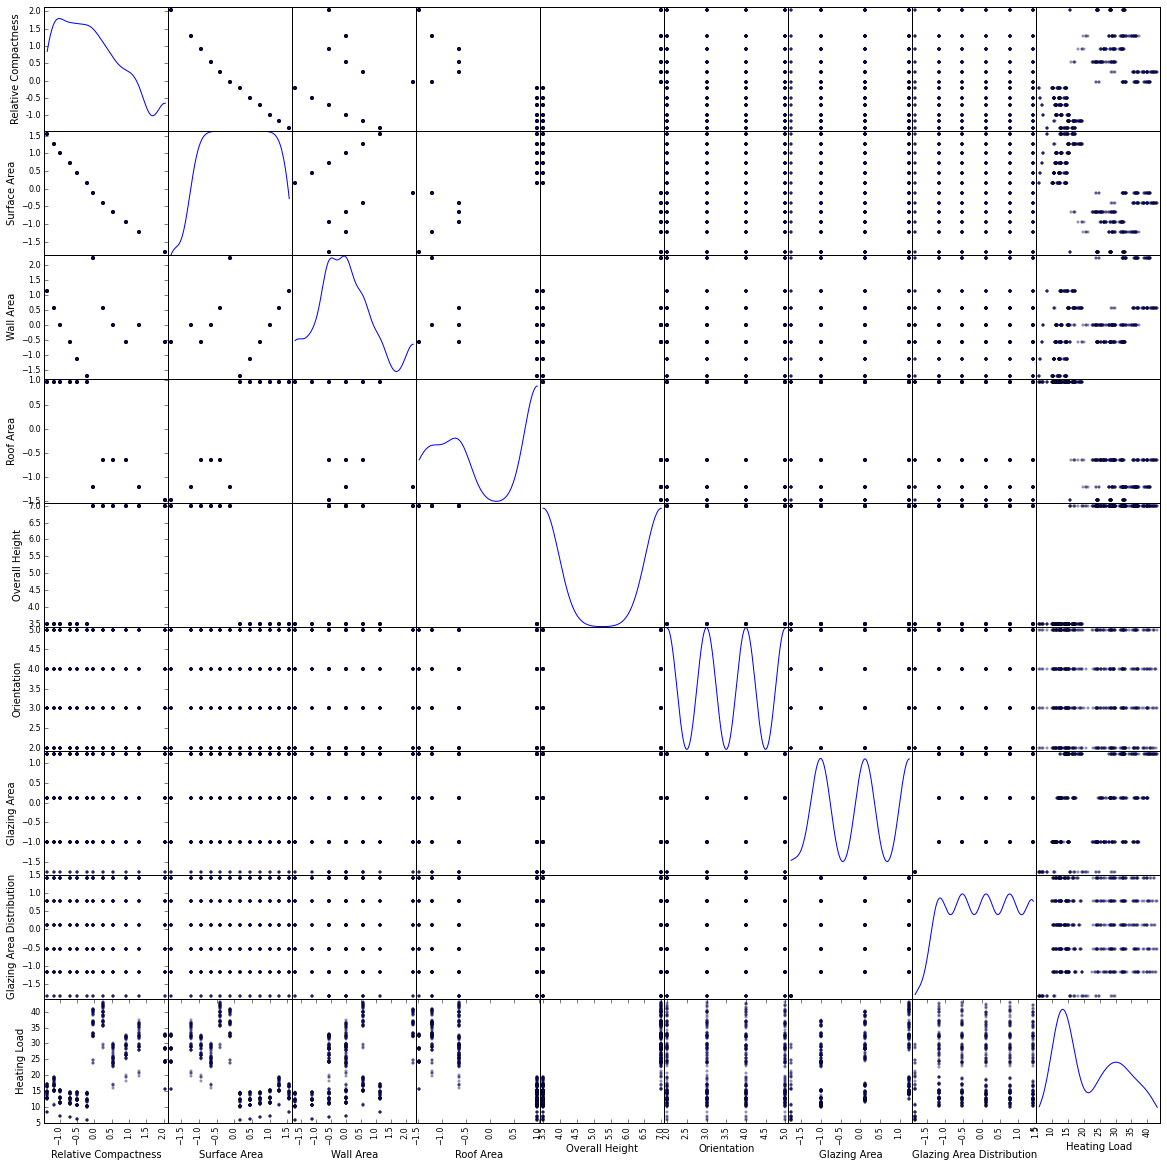

In [28]:
frame1 = eeframe
fig1 = plt.figure(1, figsize=(20, 20))
ax = fig1.gca()
scatter_matrix(frame1, alpha=0.3,
                diagonal='kde', ax = ax)
plt.show()
        

In [24]:
#Notice the correlation between Relative Compactness and Surface Area. When creating a model do 
#not use them both. One or the other will suffice.  There also seems to be a polarizing of two seperate
#groups in regard to Overall Height.  Heating Load also clusters for two variables -- Relative Compactness
#and Surface Area.

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/polynomial/polynomial.py:1383: RankWarning: The fit may be poorly conditioned
  warnings.warn(msg, pu.RankWarning)


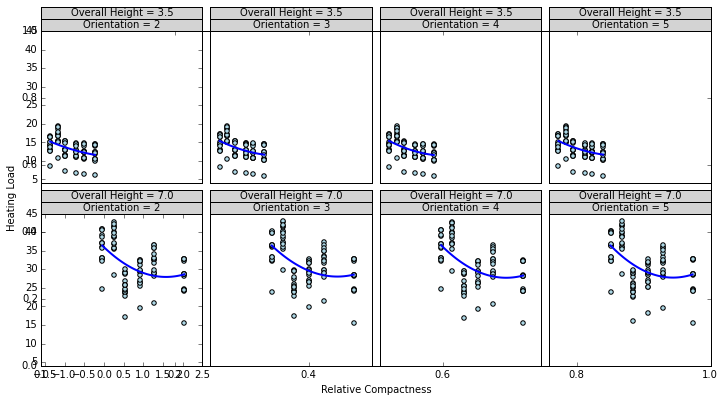

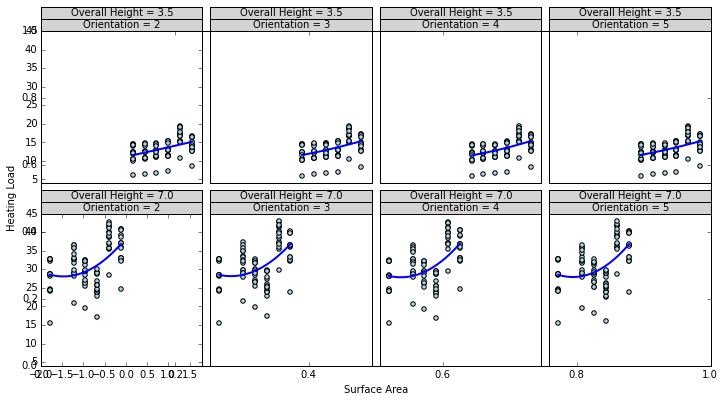

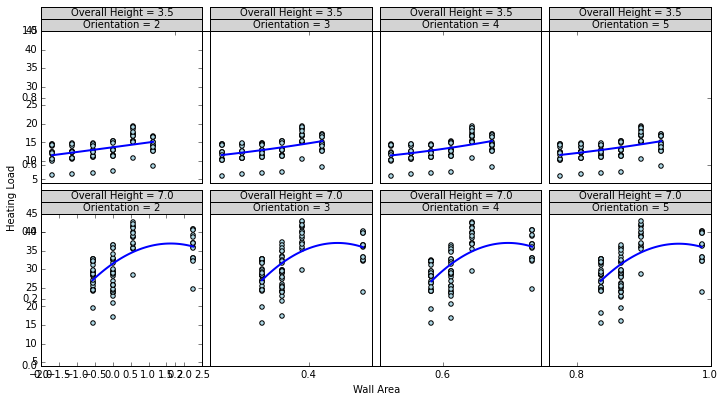

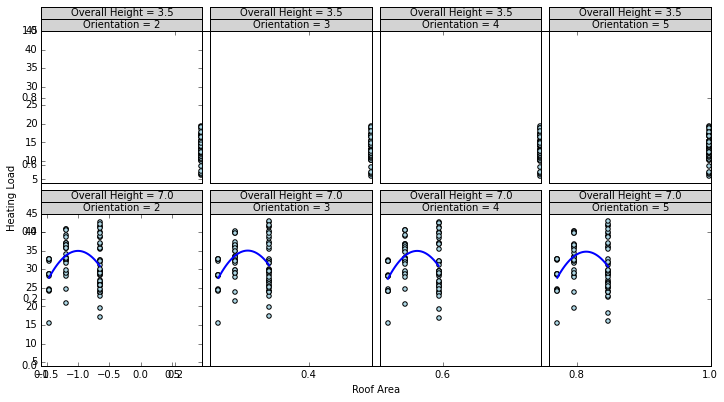

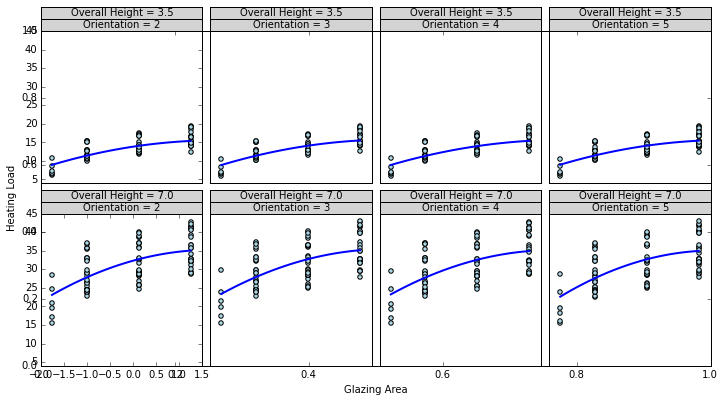

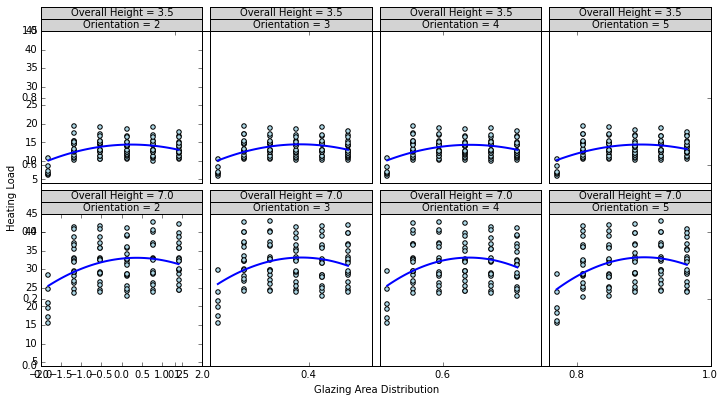

In [28]:
##Lets create conditioned scatter plots
col_list = ["Relative Compactness",
               "Surface Area",
               "Wall Area",
               "Roof Area",
               'Glazing Area',
               "Glazing Area Distribution"]
indx = 0
for col in col_list:
    if frame1[col].dtype in [np.int64, np.int32, np.float64]:
        indx += 1
        fig = plt.figure(figsize=(12,6))
        fig.clf()
        ax = fig.gca()
        plot = rplot.RPlot(frame1, x=col, y='Heating Load')
        plot.add(rplot.TrellisGrid(['Overall Height','Orientation']))
        plot.add(rplot.GeomScatter()) 
        plot.add(rplot.GeomPolyFit(degree=2)) 
        ax.set_xlabel(col) 
        ax.set_ylabel('Heating Load') 
        plot.render(plt.gcf())

In [1]:
#Note that each chart includes eight scatter plots. 
#There are two rows of shaded tiles horizontally across the top, 
#one for each level (unique value) of Orientation, and one for each of the two levels (unique values) of Overall Height. 
#Each of these scatter plots has Relative Compactness on the vertical (x) axis and Heating Load on the vertical (y) axis. 
#The data are grouped by, or condition on Overall Height value (3.5 and 7) and Orientation value (2, 3, 4, and 5).
#Examine this chart and note the following interesting features in these scatter plots:
#The range of values of Heating Load are quite different between the upper and lower
#    rows; Overall Height of 3.5 and 7, respectively. In fact, there is very little overlap in these
#values, indicating that Overall Height is an important feature in these data.
#The distribution of these data does not change significantly with the levels of
#    orientation, indicating it is not a significant feature.
#There is a notable trend of Heating Load with respect to Relative Compactness,
#    indicating Relative Compactness is a significant feature.





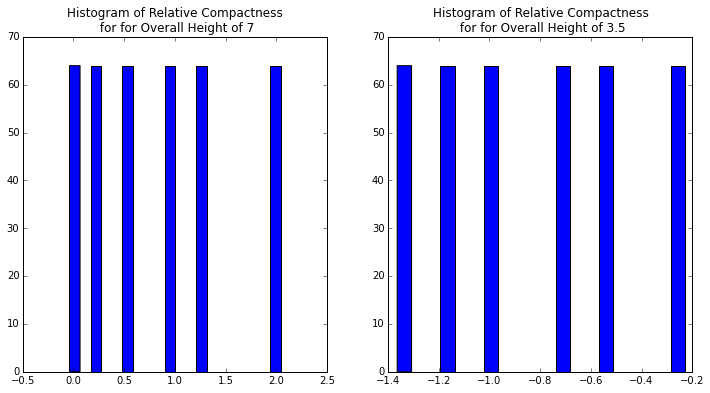

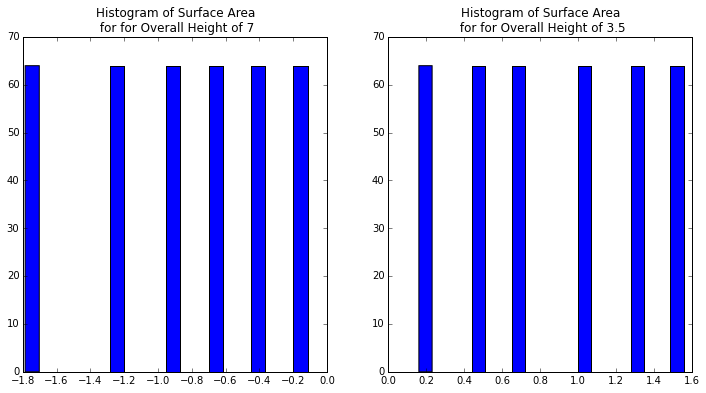

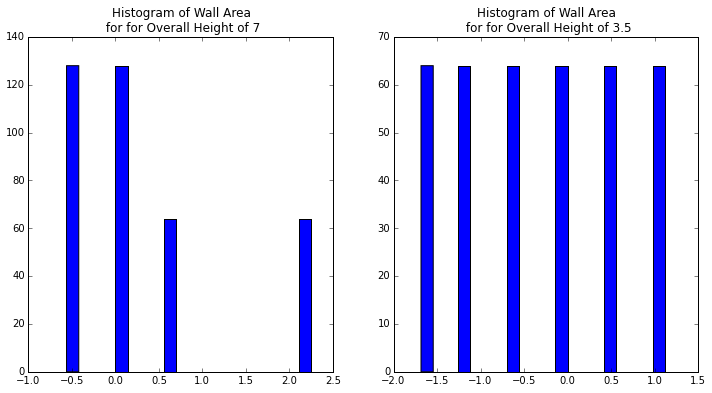

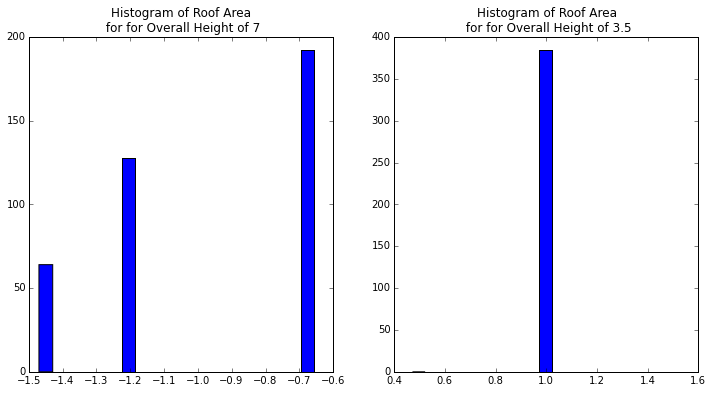

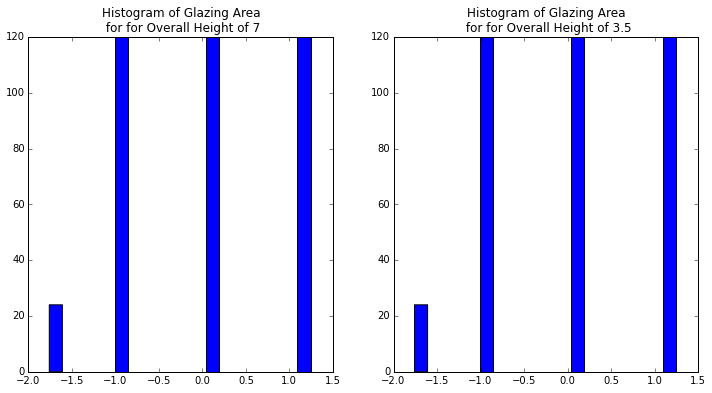

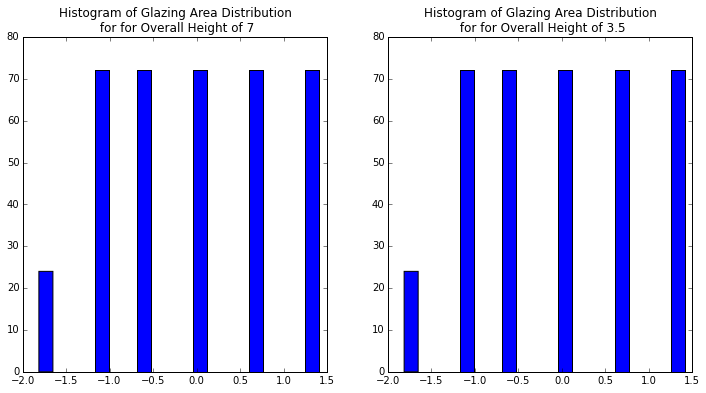

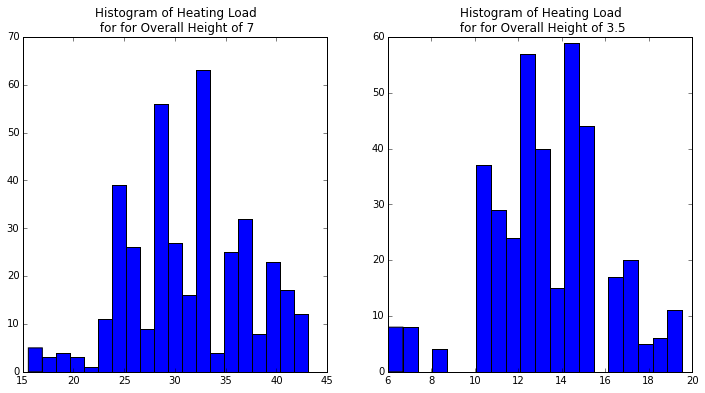

In [32]:
#Lets do some Histograms...
col_list = ["Relative Compactness",
                    "Surface Area",
                    "Wall Area",
                    "Roof Area",
                    'Glazing Area',
                    "Glazing Area Distribution",
                    "Heating Load"]
for col in col_list:
    temp7 = frame1.ix[frame1['Overall Height'] == 7, col].as_matrix()
    temp35 = frame1.ix[frame1['Overall Height'] == 3.5, col].as_matrix()
    fig = plt.figure(figsize = (12,6))
    fig.clf()
    ax7 = fig.add_subplot(1, 2, 1)
    ax35 = fig.add_subplot(1, 2, 2)
    ax7.hist(temp7, bins = 20)
    ax7.set_title('Histogram of ' +col +
                  '\n for for Overall Height of 7')
    ax35.hist(temp35, bins = 20)
    ax35.set_title('Histogram of ' +col +
                    '\n for for Overall Height of 3.5')


In [15]:
#Check out the pairs of histograms created. In most cases, the range of values on the horizontal axis 
#are quite different for the two values of Overall Height; 7 and 3.5. A few of histogram pairs show 
#little difference between the two values of Overall Height.
#Look at the histograms of Heating Load chart and note how 
#different the distribution of Heating Load is for the two values of Overall Height. In fact, 
#there is very little overlap in the range of values for the two levels of Overall Height. 
#Additionally, note the outliers in both distributions shown.


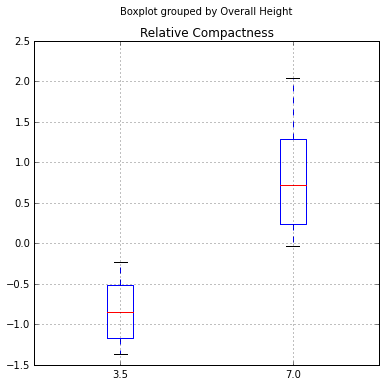

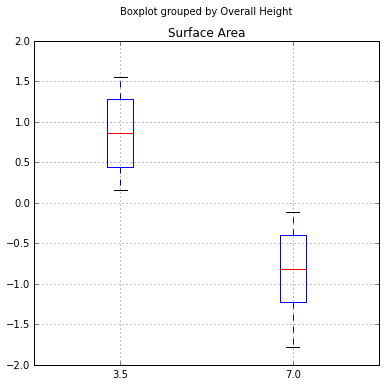

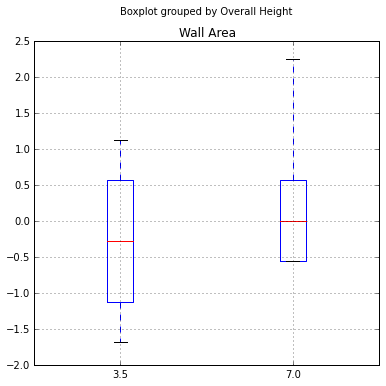

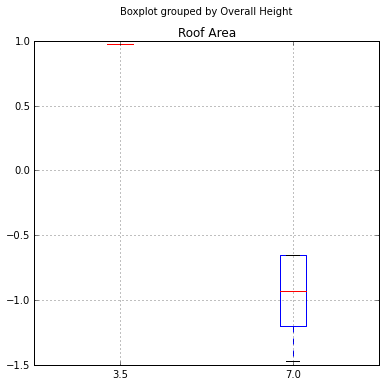

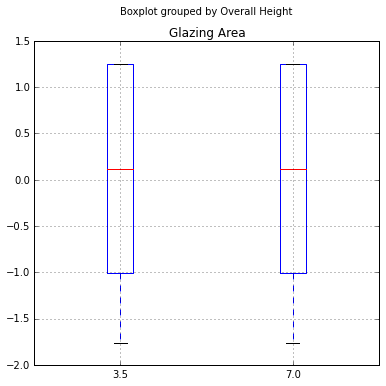

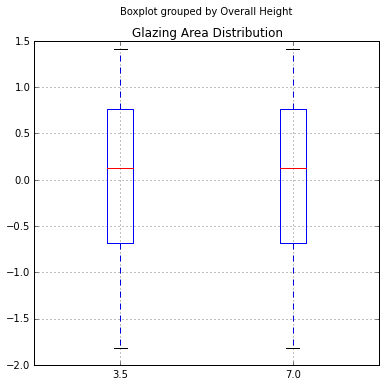

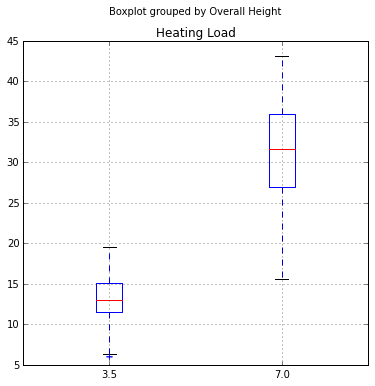

In [36]:
#And here are some Box Plots
for col in col_list:
    if(frame1[col].dtype in [np.int64, np.int32, np.float64]):
        fig = plt.figure(figsize = (6,6))
        fig.clf()
        ax = fig.gca()
        frame1[[col, 'Overall Height']].boxplot(column = [col],
                              ax = ax, by = ['Overall Height'])
        ax.set_xlabel('')

In [14]:
#Look at the boxplots created for each of the variables. These boxplots show a different view of 
#similar distribution information as the histograms.
# In most cases, there is little overlap in the values of the variable when grouped by the two levels 
#(values) of Overall Height; 7 and 3.5. A few of boxplots show little difference between the two 
#values of Overall Height.
#Check out though the boxplot of Heating Load. Note how different 
#the distribution of Heating Load is for the two values of Overall Height. In fact, there is 
#very little overlap in the range of values for the two levels of Overall Height.
